## 2 使用NumPy和SciPy进行数值分析

#### 2.1 基本概念

In [1]:
import numpy as np

In [2]:
#使用List来创造一组数据
data = [1, 2, 3]

#使用ndarray来创造一组数据
data = np.array([1, 2, 3])

#创造一组服从正态分布的定量数据
data = np.random.normal(0, 10, size=10)

#创造一组服从均匀分布的定性数据
data = np.random.randint(0, 10, size=10)

#### 2.2 中心位置（均值、中位数、众数）

In [3]:
data

array([2, 2, 0, 0, 6, 4, 0, 6, 7, 3])

In [4]:
#计算均值
print(np.mean(data))

#计算中位数
print(np.median(data))

3.0
2.5


In [5]:
from scipy.stats import mode

#计算众数
mode(data)

ModeResult(mode=array([0]), count=array([3]))

#### 2.3 发散程度（极差、方差、标准差、变异系数）

　　对数据的中心位置有所了解以后，一般我们会想要知道数据以中心位置为标准有多发散。如果以中心位置来预测新数据，那么发散程度决定了预测的准确性。数据的发散程度可用极差（PTP）、方差（Variance）、标准差（STD）、变异系数（CV）来衡量，它们的计算方法如下：  
  
$$PTP = Max(Data) - Min(Data)$$  

$$Variance = \frac{\sum_{i}^N(Data[i] - Mean)^2}{N}$$  

$$STD = \sqrt{Variance}$$  

$$CV=\frac{STD}{Mean}$$  

　　极差是只考虑了最大值和最小值的发散程度指标，相对来说，方差包含了更多的信息，标准差基于方差但是与原始数据同量级，变异系数基于标准差但是进行了无量纲处理。使用NumPy计算极差、方差、标准差和变异系数：

In [6]:
#极差
print(np.ptp(data))
print(data.ptp())

#方差
print(np.var(data))
print(data.var())

#标准差
print(np.std(data))
print(data.std())

#变异系数
print(np.mean(data) / np.std(data))
print(data.mean() / data.std())

7
7
6.4
6.4
2.52982212813
2.52982212813
1.18585412256
1.18585412256


#### 2.4 偏差程度（z-分数）

　　之前提到均值容易受异常值影响，那么如何衡量偏差，偏差到多少算异常是两个必须要解决的问题。定义z-分数（Z-Score）为测量值距均值相差的标准差数目：  

$$Z-Score = \frac{X - Mean}{STD}$$  
　　当标准差不为0且不为较接近于0的数时，z-分数是有意义的，使用NumPy计算z-分数：

In [7]:
#计算第一个值的z-分数
print((data[0] - np.mean(data)) / np.std(data))

#计算所有的z-分数
(data - np.mean(data)) / data.std()

-0.395284707521


array([-0.39528471, -0.39528471, -1.18585412, -1.18585412,  1.18585412,
        0.39528471, -1.18585412,  1.18585412,  1.58113883,  0.        ])

<font color=red>**通常来说，z-分数的绝对值大于3将视为异常。**</font>

#### 2.5 相关程度

　　有两组数据时，我们关心这两组数据是否相关，相关程度有多少。用协方差（COV）和相关系数（CORRCOEF）来衡量相关程度：  
  
$$COV=\frac{\sum_{i}^{N}(Data_{1}[i] - Mean_{1}) * (Data_{2}[i] - Mean_{2})}{N}$$  

$$CORRCOEF = \frac{COV}{STD_1 * STD_2}$$

　　协方差的绝对值越大表示相关程度越大，协方差为正值表示正相关，负值为负相关，0为不相关。相关系数是基于协方差但进行了无量纲处理。使用NumPy计算协方差和相关系数：

In [8]:
data1 = np.random.randint(0,10,10)
data2 = np.random.randint(0,10,10)

print("data1", data1)
print("data2", data2)

data1 [5 1 2 3 8 6 1 0 9 4]
data2 [4 6 6 8 8 3 1 3 5 8]


In [9]:
#计算两组数的协方差
#参数bias=1表示结果需要除以N，否则只计算了分子部分
#返回结果为矩阵，第i行第j列的数据表示第i组数与第j组数的协方差。对角线为方差
print(np.cov(data, bias=1))

#计算两组数的相关系数
#返回结果为矩阵，第i行第j列的数据表示第i组数与第j组数的相关系数。对角线为1
print(np.corrcoef(data))

6.4
1.0


#### 2.6 回顾

![2.6 回顾](./Image/2.6 回顾.png)

## 3 使用Matplotlib进行图分析

#### 3.1 基本概念

　　使用图分析可以更加直观地展示数据的分布（频数分析）和关系（关系分析）。柱状图和饼形图是对定性数据进行频数分析的常用工具，使用前需将每一类的频数计算出来。直方图和累积曲线是对定量数据进行频数分析的常用工具，直方图对应密度函数而累积曲线对应分布函数。散点图可用来对两组数据的关系进行描述。在没有分析目标时，需要对数据进行探索性的分析，箱形图将帮助我们完成这一任务。

　　在此，我们使用一组容量为10000的男学生身高，体重，成绩数据来讲解如何使Matplotlib绘制以上图形，创建数据的代码如下：

In [11]:
def genData():
    heights = []
    weights = []
    grades = []
    N = 10000
    
    for i in range(N):
        while True:
            #身高服从均值172，标准差为6的正态分布
            height = np.random.normal(172, 6)
            if 0 < height:
                break
        while True:
            #体重由身高作为自变量的线性回归模型产生，误差服从标准正态分布
            weight = (height - 80) * 0.7 + np.random.normal(0, 1)
            if 0 < weight:
                break
        while True:
            #分数服从均值为70，标准差为15的正态分布
            score = np.random.normal(70, 15)
            if 0 <= score and score <= 100:
                grade = 'E' if score < 60 else ('D' if score < 70 else ('C' if score < 80 else ('B' if score < 90 else 'A')))
            break
            
        heights.append(height)
        weights.append(weight)
        grades.append(grade)
    
    return np.array(heights), np.array(weights), np.array(grades)

heights, weights, grades = genData()

In [12]:
len(heights)

10000

#### 3.2 频数分析

##### 3.2.1 定性分析（柱状图、饼形图）

　　柱状图是以柱的高度来指代某种类型的频数，使用Matplotlib对成绩这一定性变量绘制柱状图的代码如下：

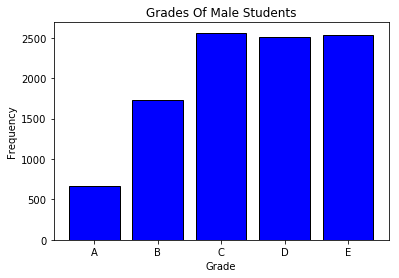

In [16]:
import matplotlib.pyplot as plt
 
#绘制柱状图
def drawBar(grades):
    xticks = ['A', 'B', 'C', 'D', 'E']
    gradeGroup = {}
    
    #对每一类成绩进行频数统计
    for grade in grades:
        gradeGroup[grade] = gradeGroup.get(grade, 0) + 1
        
    #创建柱状图
    #第一个参数为柱的横坐标
    #第二个参数为柱的高度
    #参数align为柱的对齐方式，以第一个参数为参考标准
    plt.bar(list(range(5)), [gradeGroup.get(xtick, 0) for xtick in xticks], color='b', edgecolor='black', align='center')

    #设置柱的文字说明
    #第一个参数为文字说明的横坐标
    #第二个参数为文字说明的内容
    plt.xticks(list(range(5)), xticks)

    #设置横坐标的文字说明
    plt.xlabel('Grade')
    
    #设置纵坐标的文字说明
    plt.ylabel('Frequency')
    
    #设置标题
    plt.title('Grades Of Male Students')
    
    #绘图
    plt.show()

drawBar(grades)

　　而饼形图是以扇形的面积来指代某种类型的频率，使用Matplotlib对成绩这一定性变量绘制饼形图的代码如下：

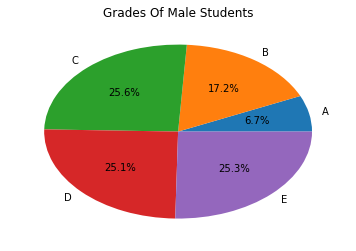

In [20]:
#绘制饼形图
def drawPie(grades):
    labels = ['A', 'B', 'C', 'D', 'E']
    gradeGroup = {}
    for grade in grades:
        gradeGroup[grade] = gradeGroup.get(grade, 0) + 1
        
    #创建饼形图
    #第一个参数为扇形的面积
    #labels参数为扇形的说明文字
    #autopct参数为扇形占比的显示格式
    plt.pie([gradeGroup.get(label, 0) for label in labels], labels=labels, autopct='%1.1f%%')
    plt.title('Grades Of Male Students')
    plt.show()
    
drawPie(grades)

##### 3.2.2 定量分析（直方图、累积曲线）

　　直方图类似于柱状图，是用柱的高度来指代频数，不同的是其将定量数据划分为若干连续的区间，在这些连续的区间上绘制柱。使用Matplotlib对身高这一定量变量绘制直方图的代码如下：

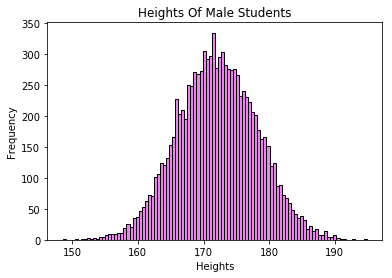

In [33]:
#绘制直方图
def drawHist(heights):
    #创建直方图
    #第一个参数为待绘制的定量数据，不同于定性数据，这里并没有事先进行频数统计
    #第二个参数为划分的区间个数
    plt.hist(heights, 100, facecolor='violet', edgecolor='black',histtype='barstacked')
    plt.xlabel('Heights')
    plt.ylabel('Frequency')
    plt.title('Heights Of Male Students')
    plt.show()
    
drawHist(heights)

使用Matplotlib对身高这一定量变量绘制累积曲线的代码如下：

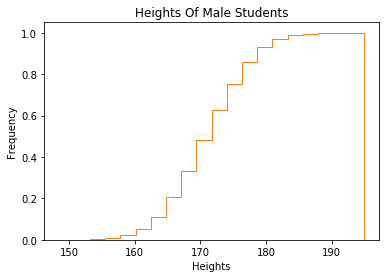

In [29]:
#绘制累积曲线
def drawCumulativeHist(heights):
    #创建累积曲线
    #第一个参数为待绘制的定量数据
    #第二个参数为划分的区间个数
    #normed参数为是否无量纲化
    #histtype参数为'step'，绘制阶梯状的曲线
    #cumulative参数为是否累积
    plt.hist(heights, 20, normed=True, histtype='step', cumulative=True)
    plt.xlabel('Heights')
    plt.ylabel('Frequency')
    plt.title('Heights Of Male Students')
    plt.show()
    
drawCumulativeHist(heights)

#### 3.3 关系分析（散点图）

　　在散点图中，分别以自变量和因变量作为横纵坐标。当自变量与因变量线性相关时，在散点图中，点近似分布在一条直线上。我们以身高作为自变量，体重作为因变量，讨论身高对体重的影响。使用Matplotlib绘制散点图的代码如下：

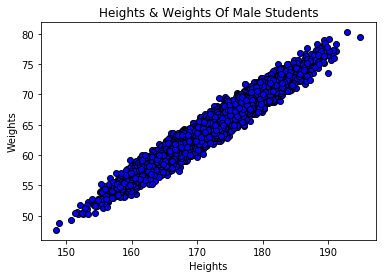

In [34]:
#绘制散点图
def drawScatter(heights, weights):
    #创建散点图
    #第一个参数为点的横坐标
    #第二个参数为点的纵坐标
    plt.scatter(heights, weights, c='b', edgecolor='black')
    plt.xlabel('Heights')
    plt.ylabel('Weights')
    plt.title('Heights & Weights Of Male Students')
    plt.show()
    
drawScatter(heights, weights)

#### 3.4 探索分析（箱形图）

　　在不明确数据分析的目标时，我们对数据进行一些探索性的分析，通过我们可以知道数据的中心位置，发散程度以及偏差程度。使用Matplotlib绘制关于身高的箱形图的代码如下：

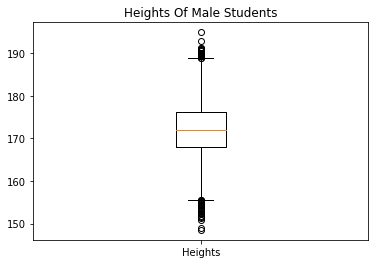

In [35]:
#绘制箱形图
def drawBox(heights):
    #创建箱形图
    #第一个参数为待绘制的定量数据
    #第二个参数为数据的文字说明
    plt.boxplot([heights], labels=['Heights'])
    plt.title('Heights Of Male Students')
    plt.show()
    
drawBox(heights)

绘制出来的箱形图中，包含3种信息：

1. Q2所指的红线为中位数。  
2. Q1所指的蓝框下侧为下四分位数，Q3所指的蓝框上侧为上四分位数，Q3-Q1为四分为差。四分位差也是衡量数据的发散程度的指标之一。  
3. 上界线和下界线是距离中位数1.5倍四分位差的线，高于上界线或者低于下界线的数据为异常值。

#### 3.5 回顾

![3.5 回顾](./Image/3.5 回顾.png)

#### 4 总结

　　描述性统计是容易操作，直观简洁的数据分析手段。但是由于简单，对多元变量的关系难以描述。现实生活中，自变量通常是多元的：决定体重不仅有身高，还有饮食习惯，肥胖基因等等因素。通过一些高级的数据处理手段，我们可以对多元变量进行处理，例如特征工程中，可以使用互信息方法来选择多个对因变量有较强相关性的自变量作为特征，还可以使用主成分分析法来消除一些冗余的自变量来降低运算复杂度。

In [36]:
pwd

'C:\\Users\\hasee\\Documents\\Python Scripts\\MyGit\\Data Analysis\\Blog'